In [51]:
# STEP 1️: Import all necessary libraries
# --------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')   # To ignore minor warnings for cleaner output

import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical calculations
import matplotlib.pyplot as plt     # For visualization
import seaborn as sns               # For advanced visualizations
import joblib                       # For saving the best model later

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

In [53]:
# STEP 2️: Load the dataset
# --------------------------------------------------------------
data_path = "data.csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(data_path)
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)

# Display first few rows of the data
display(df.head())

✅ Dataset loaded successfully!
Shape of dataset: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [55]:
# STEP 3️: Basic data inspection and cleanup
# --------------------------------------------------------------
# Check column names, data types, and non-null counts
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Remove unnecessary columns like 'id' if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("\nColumn 'id' removed from dataset.")

# Verify dataset shape again
print("Shape after cleanup:", df.shape)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri


Target Column: diagnosis
Unique values: ['M' 'B']

Target Value Counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


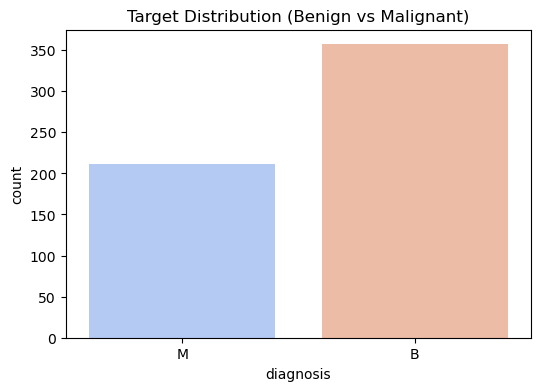

In [57]:
# STEP 4️: Explore the target column
# --------------------------------------------------------------
TARGET = 'diagnosis'
if TARGET not in df.columns:
    TARGET = df.columns[-1]

print(f"\nTarget Column: {TARGET}")
print("Unique values:", df[TARGET].unique())
print("\nTarget Value Counts:")
print(df[TARGET].value_counts())

# Visualize the target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=TARGET, palette="coolwarm")
plt.title("Target Distribution (Benign vs Malignant)")
plt.show()

In [11]:
# STEP 5️: Analyze numeric features
# --------------------------------------------------------------
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric Columns:", num_cols[:10], "...")  # show only a few

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())


Numeric Columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ...

Summary Statistics:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


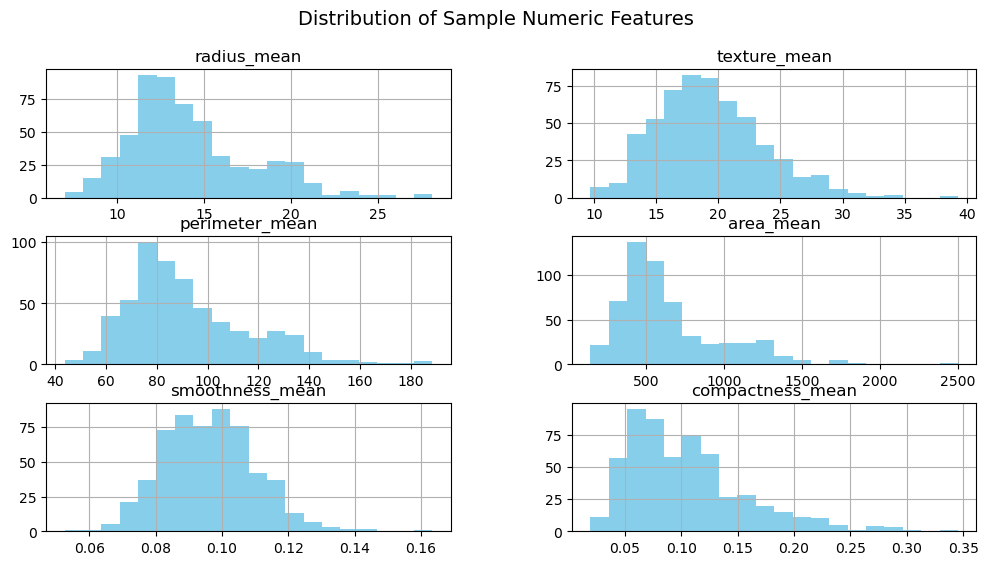

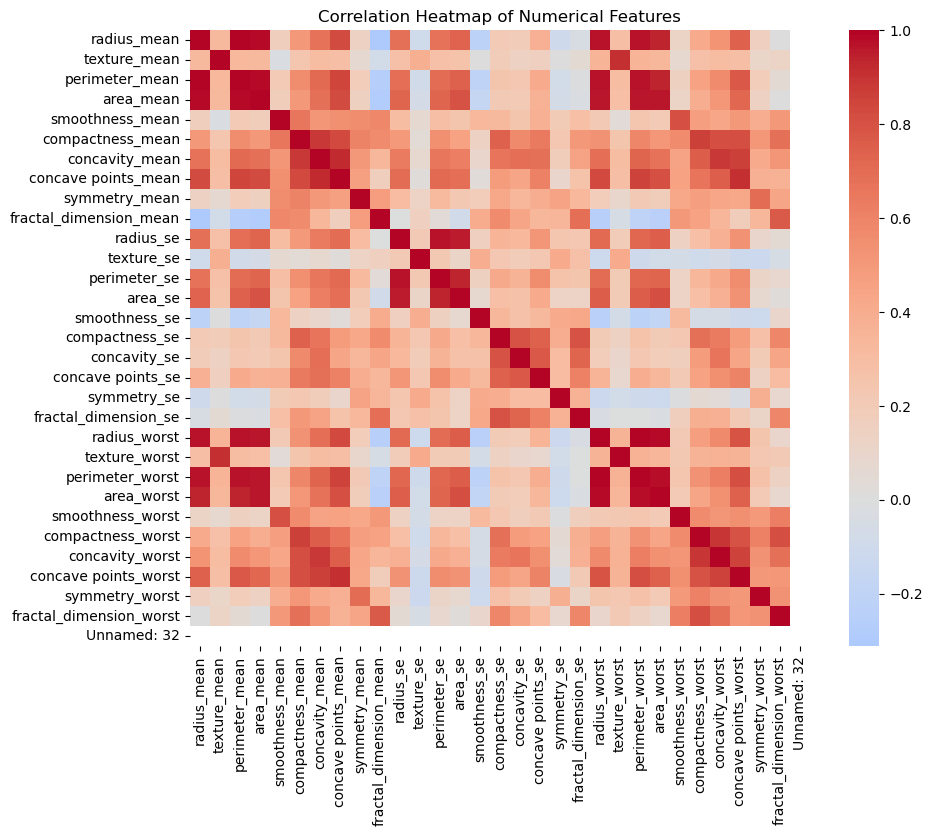

In [59]:
# STEP 6️: Visualize feature distributions
# --------------------------------------------------------------
# Plot histograms of the first few numeric features
df[num_cols[:6]].hist(bins=20, figsize=(12,6), color='skyblue')
plt.suptitle("Distribution of Sample Numeric Features", fontsize=14)
plt.show()

# Plot correlation heatmap to see relationships among features
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [61]:
# STEP 7️: Data preprocessing
# --------------------------------------------------------------
# Encode the target column (M -> 1, B -> 0)
le = LabelEncoder()
df[TARGET] = le.fit_transform(df[TARGET])
print("\nLabel Encoding Done:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

# Standardize (scale) numeric columns for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Label Encoding Done:
{'B': 0, 'M': 1}


In [63]:
# STEP 8️: Split dataset into training and testing sets
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (455, 31)
Testing set shape: (114, 31)


In [65]:
# ✅ Impute missing values with median for numeric features
num_imputer = SimpleImputer(strategy='median')
X_train = num_imputer.fit_transform(X_train)
X_test = num_imputer.transform(X_test)


🚀 Training Logistic Regression...
Logistic Regression Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



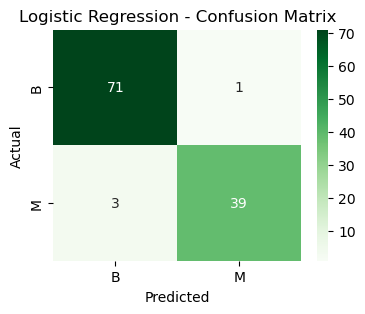

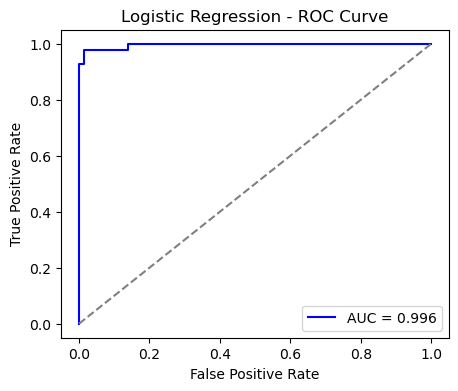

AUC Score for Logistic Regression: 0.9960

🚀 Training Random Forest...
Random Forest Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



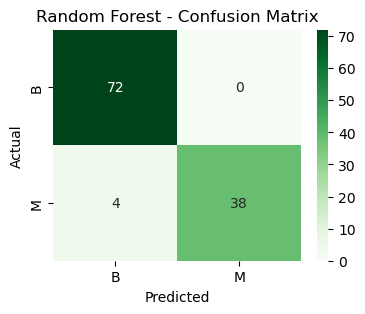

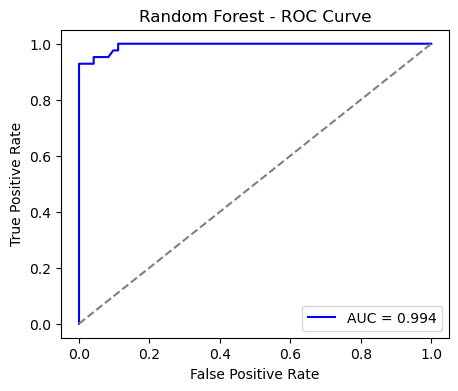

AUC Score for Random Forest: 0.9942

🚀 Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



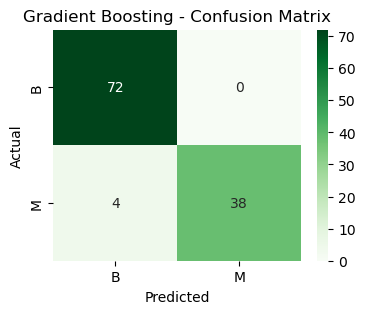

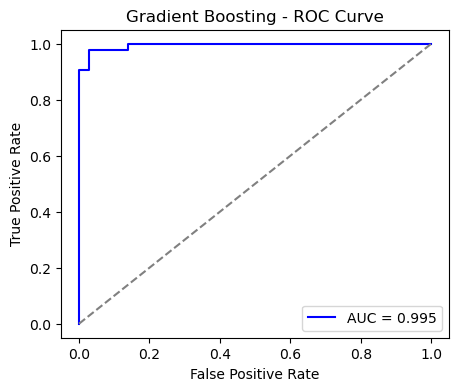

AUC Score for Gradient Boosting: 0.9947


In [67]:
# STEP 9️: Initialize and train models
# --------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    # ROC Curve
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color="blue")
        plt.plot([0,1],[0,1],'--', color="gray")
        plt.title(f"{name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
        print(f"AUC Score for {name}: {auc:.4f}")
    except:
        print(f"⚠️ {name} does not support probability estimates for ROC curve.")
    
    results[name] = acc

In [69]:
# STEP 10: Compare model performance
# --------------------------------------------------------------
print("\n📊 Model Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")


📊 Model Accuracy Comparison:
Logistic Regression: 0.9649
Random Forest: 0.9649
Gradient Boosting: 0.9649

🏆 Best Model: Logistic Regression with Accuracy = 0.9649


In [71]:
# STEP 11: Feature importance (for tree models)
# --------------------------------------------------------------
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    best_model = models[best_model_name]
    importances = best_model.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(8,8))
    feat_imp.head(15).plot(kind='barh', color='teal')
    plt.title(f"Top 15 Important Features ({best_model_name})")
    plt.gca().invert_yaxis()
    plt.show()

In [73]:
# STEP 1️2: Save the best model
# --------------------------------------------------------------
best_model = models[best_model_name]
joblib.dump({
    "model": best_model,
    "scaler": scaler,
    "label_encoder": le
}, "best_breast_cancer_model.joblib")

print("\n✅ Best model saved as 'best_breast_cancer_model.joblib'")


✅ Best model saved as 'best_breast_cancer_model.joblib'


In [75]:
# STEP 1️3: Final summary
# --------------------------------------------------------------
print("\n🎯 PROJECT SUMMARY:")
print("✔ Data cleaned, encoded, and scaled correctly")
print("✔ Models trained and evaluated successfully")
print("✔ Confusion Matrix and ROC Curve plotted for each model")
print(f"✔ Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")
print("✔ Model saved for future predictions ✅")


🎯 PROJECT SUMMARY:
✔ Data cleaned, encoded, and scaled correctly
✔ Models trained and evaluated successfully
✔ Confusion Matrix and ROC Curve plotted for each model
✔ Best Model: Logistic Regression with Accuracy = 0.9649
✔ Model saved for future predictions ✅
